# Introduction

<figure style="display: table; text-align:center; margin-left: auto; margin-right:auto">

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/simphony/docs/v4.0.0rc3?filepath=docs%2Fusage%2Fwrappers%2Fintroduction.ipynb "Click to run this tutorial yourself!")
    
</figure>

SimPhoNy Wrappers are pieces of software that seamlessly translate [assertional knowledge](../assertional_knowledge.ipynb) to a form that is compatible with a specific simulation engine, database, data repository or file format. The way to interact with wrappers is through a [session object](../../api_reference.md#simphony_osp.session.Session) that is connected to them. Therefore, before continuing, make sure that you have read the [previous section on sessions](../sessions/index.md).

A few wrappers are included with SimPhoNy, but generally, they must be [installed separately](../introduction/installation.md#Wrapper-installation). The included wrappers are:

- [SQLite wrapper](sqlite.ipynb)
- [SQLAlchemy wrapper](sqlalchemy.ipynb)
- [Dataspace wrapper](dataspace.ipynb)
- [Remote wrapper](remote.ipynb)

After installation, wrappers are available under the `simphony_osp.wrappers` module.

<div class="admonition important">
<div class="admonition-title" style="font-weight: bold"><div style="display: inline-block">Tip</div></div>
    
The `simphony_osp.wrappers` module supports IPython autocompletion. When working on a Jupyter notebook, it is possible to get the installed wrappers as suggestions writing <code class="pre">`from simphony_osp.wrappers import `</code> and pressing TAB.

</div>

As described on the [introduction to sessions](../sessions/introduction.ipynb), sessions, and as a consequence also wrappers, work in a way similar to databases.  To start using them, one first has to “open” or “connect” to them. After that, changes can be performed on the data they contain, but such changes are not made permanent until a “commit” is performed. When one finishes working with them, the connection should be “closed”. Unconfirmed changes are lost when the connection is “closed”.

Let's see how to manage a wrapper session using the SQLite wrapper as example.

In [1]:
from simphony_osp.wrappers import SQLite

To initialize a session linked to a wrapper, call the imported object. Wrappers take two positional arguments: the `configuration_string` and the `create` argument.

The configuration string lets the wrapper know which resource to "open" or to "connect to". For the SQLite wrapper, it is the path of an SQLite database file. The `create` arguments can be set to `True` to ask the wrapper to create the resource specified by the configuration string if it does not already exist.

In [2]:
sqlite = SQLite('database.db', True)
sqlite.clear();  # just in case you already ran this notebook
sqlite.lock();  # was explained in the "introduction to sessions" section
sqlite

In [3]:
len(sqlite)

0

<div class="admonition note">
<div class="admonition-title" style="font-weight: bold"><div style="display: inline-block">Note</div></div>
    
Some wrappers may accept additional keyword arguments.
    
</div>

As you can see, the `sqlite` object that has been created is just a normal session that can store ontology individuals. The wrapper session is **automatically "opened" when it is created**.

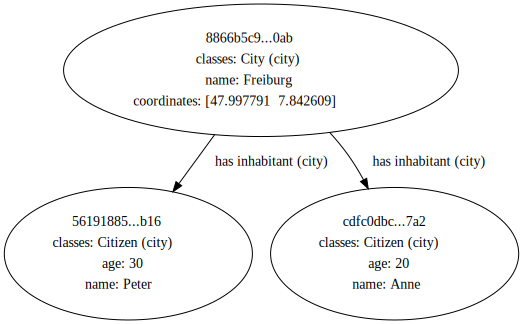

In [4]:
from simphony_osp.namespaces import city
from simphony_osp.tools import semantic2dot

with sqlite:
    freiburg = city.City(name="Freiburg", coordinates=[47.997791, 7.842609])
    peter = city.Citizen(name="Peter", age=30)
    anne = city.Citizen(name="Anne", age=20)
    freiburg[city.hasInhabitant] += peter, anne
    
semantic2dot(sqlite)

To confirm the set of changes that have been performed, it is necessary to "commit" them. Remember that **uncommitted changes are lost** after closing the session or the Python shell.

In [5]:
sqlite.commit()

After the job is done, the session should be "closed" to free the resource that is being used. In the SQLite case, to close the database file.

In [6]:
sqlite.close()

The city and its citizens have been successfully saved to the database file. If the wrapper is used to reopen the database, the saved individuals will be available in the resulting session object.

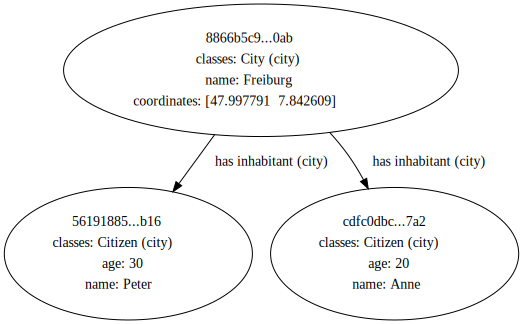

In [7]:
from IPython.display import display

with SQLite('database.db', True) as sqlite:
    display(semantic2dot(sqlite))

Wrappers sessions that interact with simulation engines have an additional method, `compute`, that executes the simulation and updates the session to reflect the new status of the individuals involved. Depending on the wrapper, the `compute` method may accept keyword arguments. The [quickstart](../../introduction/quickstart.ipynb#Wrappers) tutorial demonstrates the use of the `compute` method with the [SimLAMMPS](https://github.com/simphony/simphony-osp-simlammps) wrapper, as well as how transfer of ontology individuals between different wrappers, which is done in exactly the same way as [between sessions](../sessions/management.ipynb). 